# Bharat Intern - Data Science

# Task 1:stock prediction  using LSTM

In [6]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
#loading the dataset
df=pd.read_csv('C:\Bharat Intern\Amazon.csv')
print(df)

            Date         High          Low         Open        Close  \
0     1997-12-31     5.041667     4.843750     4.875000     5.020833   
1     1998-01-02     5.000000     4.796875     5.000000     4.958333   
2     1998-01-05     4.937500     4.708333     4.885417     4.750000   
3     1998-01-06     4.875000     4.666667     4.697917     4.838542   
4     1998-01-07     4.833333     4.692708     4.833333     4.781250   
...          ...          ...          ...          ...          ...   
6094  2022-03-21  3261.679932  3191.060059  3222.419922  3229.830078   
6095  2022-03-22  3323.340088  3233.979980  3236.110107  3297.780029   
6096  2022-03-23  3327.399902  3253.739990  3274.100098  3268.159912   
6097  2022-03-24  3282.370117  3201.000000  3274.989990  3272.989990   
6098  2022-03-25  3307.370117  3247.489990  3280.000000  3282.010010   

         Volume    Adj Close  
0     4446000.0     5.020833  
1     1660800.0     4.958333  
2     3590400.0     4.750000  
3     41748

In [7]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1997-12-31,5.041667,4.843750,4.875000,5.020833,4446000.0,5.020833
1,1998-01-02,5.000000,4.796875,5.000000,4.958333,1660800.0,4.958333
2,1998-01-05,4.937500,4.708333,4.885417,4.750000,3590400.0,4.750000
3,1998-01-06,4.875000,4.666667,4.697917,4.838542,4174800.0,4.838542
4,1998-01-07,4.833333,4.692708,4.833333,4.781250,2725200.0,4.781250


In [8]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,6099.000000,6099.000000,6099.000000,6099.000000,6.099000e+03,6099.000000
mean,586.605260,572.914592,580.099511,579.906356,7.344459e+06,579.906356
std,936.025687,914.780867,926.023165,925.392745,7.110132e+06,925.392745
min,4.385417,4.145833,4.166667,4.260417,8.813000e+05,4.260417
25%,41.799999,40.230000,41.025000,41.029999,3.608750e+06,41.029999
50%,126.610001,122.180000,123.900002,124.540001,5.470000e+06,124.540001
75%,657.359985,637.445007,646.979980,642.824982,8.280450e+06,642.824982
max,3773.080078,3696.790039,3744.000000,3731.409912,1.043292e+08,3731.409912


In [10]:
data=df.sort_values(by="High")
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
7,1998-01-12,4.385417,4.145833,4.166667,4.302083,7401600.0,4.302083
8,1998-01-13,4.666667,4.322917,4.343750,4.645833,7321200.0,4.645833
6,1998-01-09,4.666667,4.229167,4.666667,4.260417,6643200.0,4.260417
5,1998-01-08,4.703125,4.531250,4.697917,4.614583,6015600.0,4.614583
18,1998-01-28,4.833333,4.625000,4.750000,4.770833,5293200.0,4.770833


In [11]:
df.shape

(6099, 7)

In [12]:
# for Finding the NULL Values
df.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [13]:
#to set the date to the index
df.set_index('Date',inplace=True)

Text(0.5, 1.0, 'Amazon Stock Predictions ')

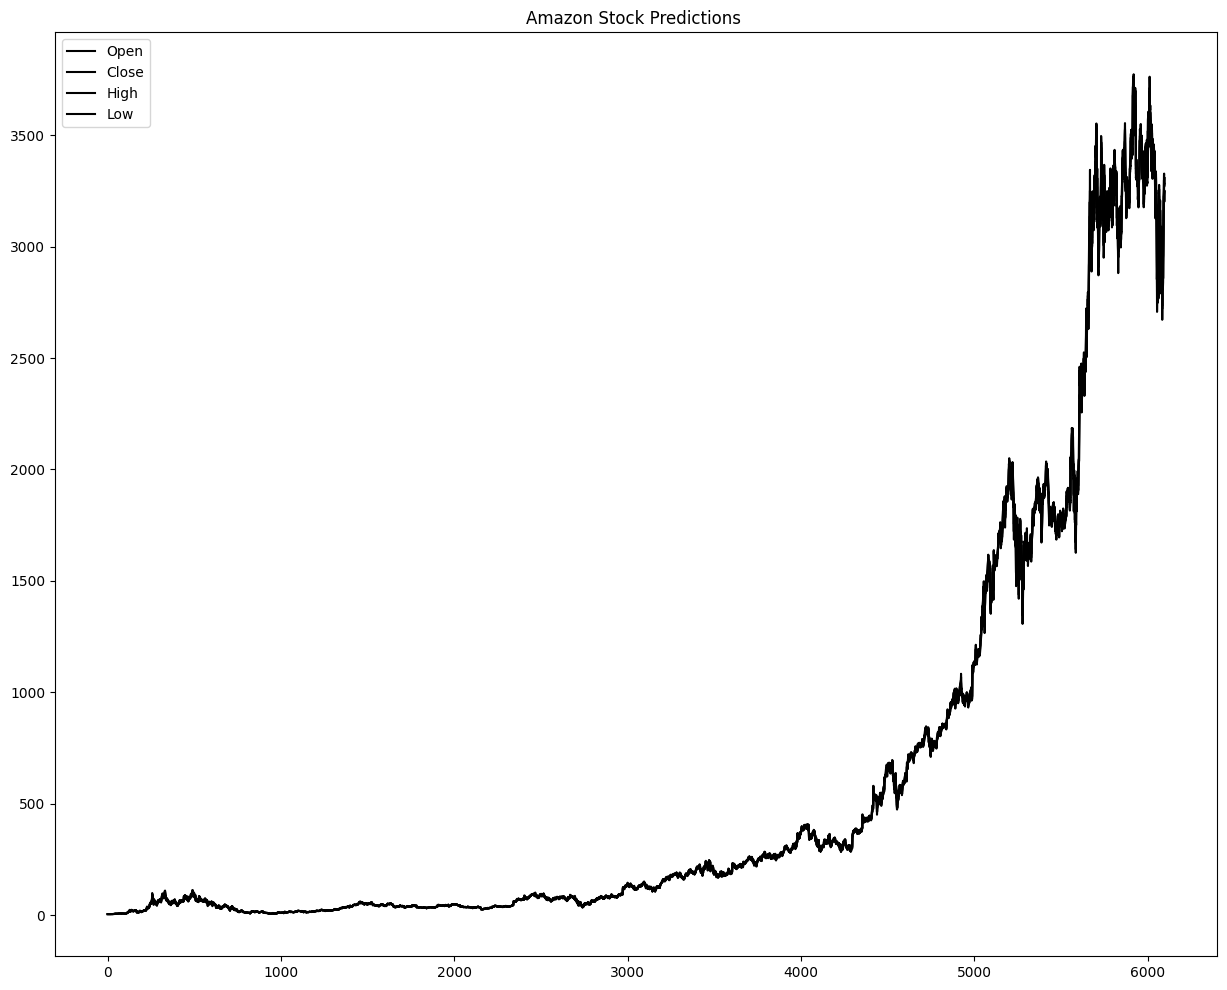

In [22]:
df[['Open','Close','High','Low']].plot(figsize=(15,12),color="black")
plt.title('Amazon Stock Predictions ')


In [28]:
df=data['Close']
df

7          4.302083
8          4.645833
6          4.260417
5          4.614583
18         4.770833
           ...     
5918    3719.340088
5919    3718.550049
5917    3731.409912
6012    3676.570068
5920    3677.360107
Name: Close, Length: 6099, dtype: float64

In [29]:
#performing scaling on data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))
df

array([[1.11790608e-05],
       [1.03407720e-04],
       [0.00000000e+00],
       ...,
       [1.00000000e+00],
       [9.85286385e-01],
       [9.85498353e-01]])

In [30]:
#Now ,For performing the train data and test data by splitting,
#here training data is 80% and testing data is 20%
train_size=int(len(df)*0.80)
test_size=len(df)-train_size
train_data,test_data=df[0:train_size,:],df[train_size:len(df),:1]


In [31]:
train_size,test_size

(4879, 1220)

In [18]:
#importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Dropout



In [3]:
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='adam')

In [4]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [8]:
#For creating the training test data and train data 
def createData(df,seq_len=1):
    x,y=[],[]
    for i in range(len(data_set)-seq_len-1):
        a=df[i:(i+seq_len),0]
        x.append(a)
        y.append(df[i+seq_len,0])
        return np.array(x),np.array(y)

Text(0, 0.5, 'Stock Price')

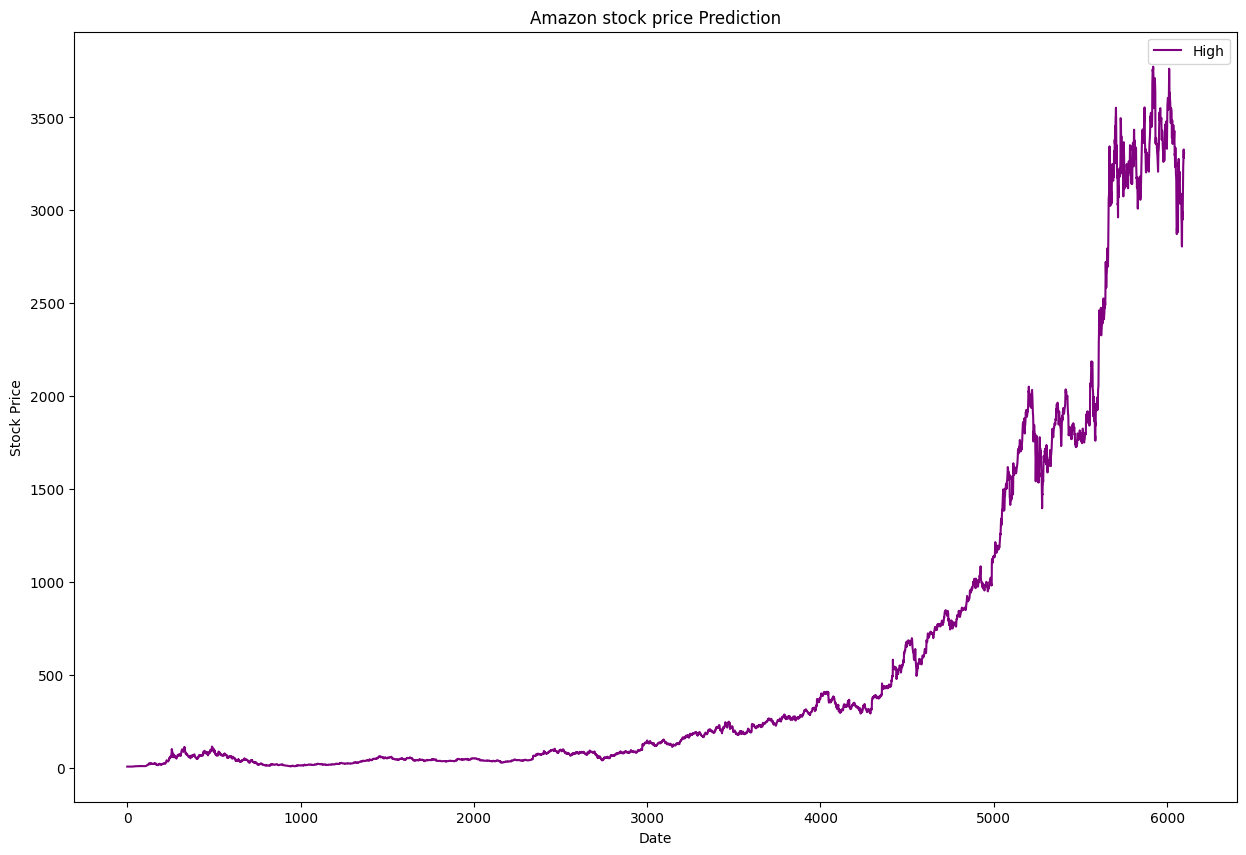

In [23]:
import matplotlib.pyplot as plt
df[['High']].plot(figsize=(15,10),alpha =1,color="purple")
plt.title('Amazon stock price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')

Text(0, 0.5, 'Stock Price')

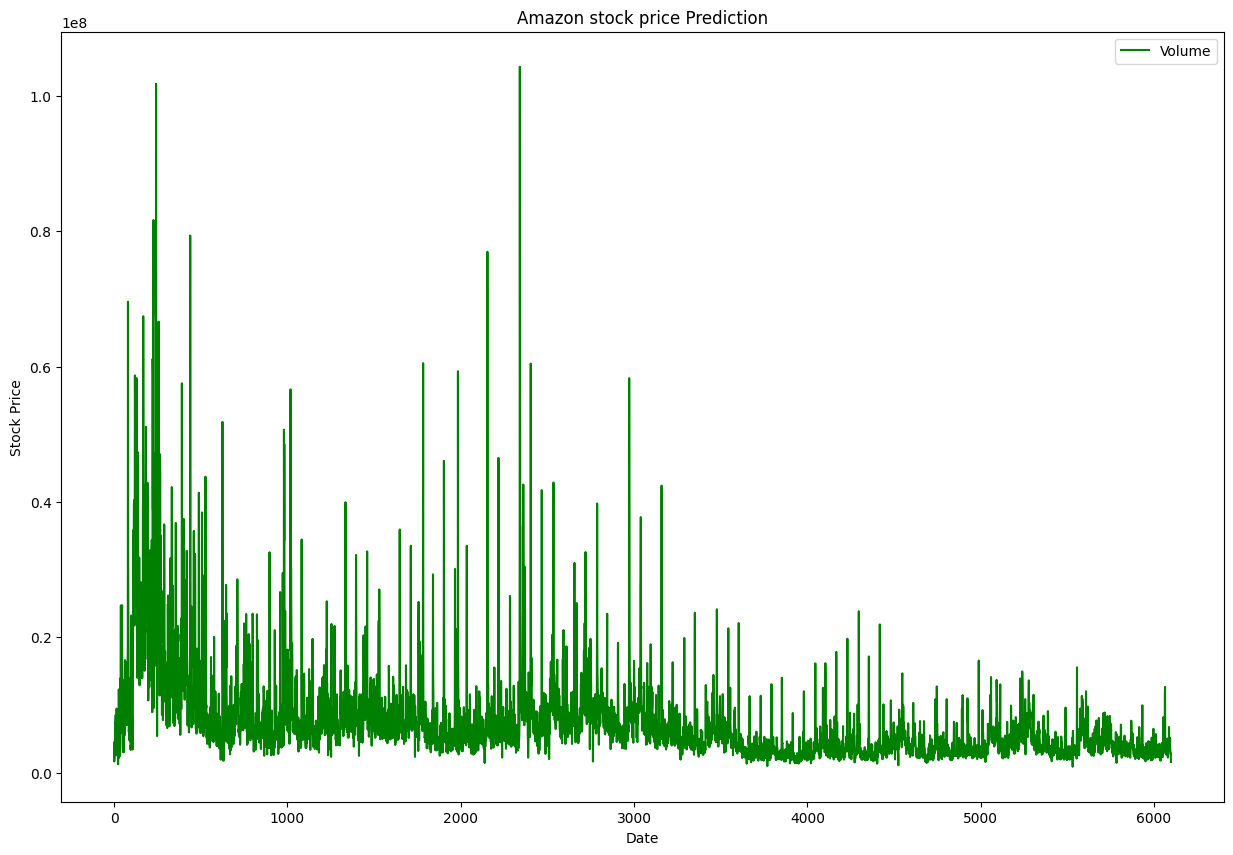

In [19]:
import matplotlib.pyplot as plt
df[['Volume']].plot(figsize=(15,10),alpha =1,color="green")
plt.title('Amazon stock price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')

# Conclusion:
Hence predicted and Forecasted stock Market trends